## Urban Sounds Classification  
### Neural Net,  AdaBoost, Bagging

In [91]:
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import skflow

from collections import Counter
from sklearn import datasets, metrics, cross_validation
from sklearn.cross_validation import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, mean_squared_error
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier

%matplotlib inline

In [122]:
def plotHeatmap(y_actual, y_pred, y_labels, printCF=False):
    y_counts = np.asarray(Counter(y_actual).values())
    confMat = confusion_matrix(y_true=y_test, y_pred=y_pred)
    if printCF:
        print(confMat)
    confMatNorm = np.true_divide(confMat, y_counts)
    
    fig, ax = plt.subplots()
    heatmap = ax.pcolor(confMatNorm, cmap=plt.cm.jet, vmin=0, vmax=1)

    # locate ticks
    ax.set_xticks(np.arange(confMatNorm.shape[0])+0.5, minor=False)
    ax.set_yticks(np.arange(confMatNorm.shape[1])+0.5, minor=False)

    # move x ticks to top
    ax.invert_yaxis()
    ax.xaxis.tick_top()

    ax.set_xticklabels(y_labels, minor=False, rotation='vertical')
    ax.set_yticklabels(y_labels, minor=False)

    #ax.set_xlabel('Predicted Class')
    ax.set_ylabel('Actual Class')

    plt.show()

In [2]:
# Import Pre-Processed Wav File Data Set
wavData = pd.read_csv('feature_quant.csv')

# Remove Empty Rows
wavData = wavData[-np.isnan(wavData['mean'])]

In [3]:
print len(wavData)
print wavData[0:2]

611
   Unnamed: 0          std      mean    power2    power7    power5   kurtosis  \
0  100032.wav  5387.262558 -0.173201  0.218719  0.021339  0.107915   8.378661   
1  100263.wav   172.622405 -2.877835  0.077798  0.102353  0.091911  10.631201   

   skewness   power10    power4    power9    power6    power1    power8  \
0  0.290676  0.004058  0.286047  0.007275  0.049451  0.030802  0.011321   
1 -0.037141  0.094223  0.112095  0.095986  0.145623  0.082727  0.108314   

              class    power3  
0          dog_bark  0.263073  
1  children_playing  0.088970  


In [7]:
# create feature (only) array by dropping index and class columns
feat = list(wavData.columns)
feat.remove('class')
feat.remove('Unnamed: 0')

In [95]:
# convert class labels to numeric category 0-9
le = LabelEncoder()
y = wavData.loc[:,'class']
y = le.fit_transform(y)
y_labels = list(le.classes_)

In [9]:
# split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(wavData.loc[:,feat], y, \
                                                    test_size=0.3, random_state=0)
X_train.shape

(427, 14)

In [10]:
# scale data according to training set distribution
sc = StandardScaler()
sc=sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

### Neural Network  
Results with 10000 steps with learning rates 0.1, 0.01, 0.001:  
  
5 hidden units - 0.266, 0.239  
7 hidden units - ****0.348****, 0.266 (20000 steps, 0.1 learning rate: 0.288)  
10 hidden units - 0.266, 0.304  
30 hidden units - 0.250, 0.299  
50 hidden units - 0.277, 0.315  
100 hidden units - 0.250, 0.321 (20000 steps, 0.01 learning rate: 0.310)  
  
[5,10,5] hidden units - 0.254, 0.310 (20000 steps, 0.01 learning rate: 0.310)  
[10,20,10] hidden units - 0.293, 0.304 (20000 steps, 0.01 learning rate: 0.293)  
[30,60,30] hidden units - 0.304, 0.261 (20000 steps, 0.1 learning rate: 0.310)  
[50,100,50] hidden units - 0.283, 0.283  

In [40]:
classifier = skflow.TensorFlowDNNClassifier(hidden_units=[7], n_classes=10, steps=10000, \
                                            tf_random_seed=0, learning_rate = 0.1)
classifier.fit(X_train_std, y_train)
score = metrics.accuracy_score(y_test, classifier.predict(X_test_std))
print("Accuracy: %f" % score)

Step #100, epoch #7, avg. train loss: 2.27826
Step #200, epoch #14, avg. train loss: 2.01109
Step #300, epoch #21, avg. train loss: 1.94619
Step #400, epoch #28, avg. train loss: 1.88617
Step #500, epoch #35, avg. train loss: 1.86631
Step #600, epoch #42, avg. train loss: 1.84755
Step #700, epoch #50, avg. train loss: 1.82315
Step #800, epoch #57, avg. train loss: 1.79981
Step #900, epoch #64, avg. train loss: 1.77271
Step #1000, epoch #71, avg. train loss: 1.75846
Step #1100, epoch #78, avg. train loss: 1.75028
Step #1200, epoch #85, avg. train loss: 1.72983
Step #1300, epoch #92, avg. train loss: 1.70977
Step #1400, epoch #100, avg. train loss: 1.70712
Step #1500, epoch #107, avg. train loss: 1.68873
Step #1600, epoch #114, avg. train loss: 1.67932
Step #1700, epoch #121, avg. train loss: 1.66595
Step #1800, epoch #128, avg. train loss: 1.66455
Step #1900, epoch #135, avg. train loss: 1.65475
Step #2000, epoch #142, avg. train loss: 1.65737
Step #2100, epoch #150, avg. train loss: 1.

[[ 0  1  2  2  1  0  0  0  0  2]
 [ 0  3  4  7  1  1  1  0  0  3]
 [ 0  2 10  6  1  0  0  0  0  2]
 [ 0  1  7 20  2  0  8  0  0  5]
 [ 0  2  0  4  7  2  3  0  0  2]
 [ 0  1  1  5  0  1  0  0  0  3]
 [ 0  1  1  2  2  1 13  0  0  0]
 [ 0  0  2  1  0  0  0  0  0  1]
 [ 0  2  2  8  2  0  0  0  0  3]
 [ 0  1  3  4  0  0  2  0  0 10]]


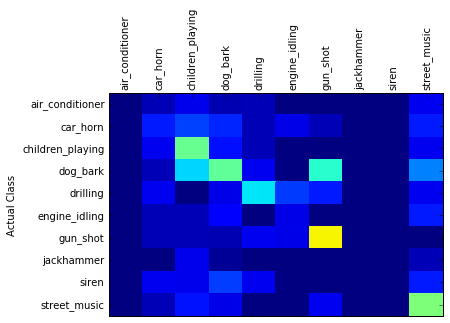

In [120]:
plotHeatmap(y_test, classifier.predict(X_test_std), y_labels)

### AdaBoost Classifier  
Decision tree depth with learning rate 0.1 and 500, 1000, 2000, 5000 estimators:  
1 - 0.310  
2 - 0.299  
4 - 0.342, 0.353, 0.359  
6 - 0.386, 0.380, ****0.391****, 0.386  
8 - 0.353, 0.375, 0.370, 0.359  
10 - 0.304  

In [123]:
tree = DecisionTreeClassifier(criterion='entropy',
                             max_depth=6)
ada = AdaBoostClassifier(base_estimator=tree,
                        n_estimators=2000,
                        learning_rate=0.1,
                        random_state=0)
ada = ada.fit(X_train_std, y_train)
y_train_pred = ada.predict(X_train_std)
y_test_pred = ada.predict(X_test_std)
ada_train = accuracy_score(y_train, y_train_pred)
ada_test = accuracy_score(y_test, y_test_pred)
print('AdaBoost train/test accuracies %.3f/%.3f'
     % (ada_train, ada_test))

AdaBoost train/test accuracies 1.000/0.391


[[ 1  1  0  3  2  1  0  0  0  0]
 [ 0  1  5  6  3  3  0  0  0  2]
 [ 0  1  7  9  0  1  0  0  0  3]
 [ 0  1  0 34  0  1  4  0  0  3]
 [ 0  0  0 10  5  1  1  0  1  2]
 [ 1  1  0  4  1  3  0  0  0  1]
 [ 0  0  0  7  0  2 11  0  0  0]
 [ 0  0  0  3  0  0  0  0  0  1]
 [ 1  1  0  7  3  1  0  1  1  2]
 [ 0  0  2  5  1  2  0  0  1  9]]


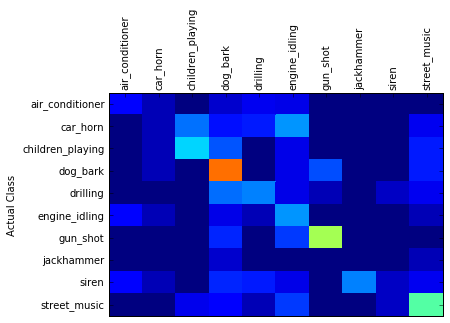

In [124]:
plotHeatmap(y_test, y_test_pred, y_labels, printCF=True)

### Bagging Classifier  
Decision tree depth none, varying estimators, max samples, max features:  
estimators, max samples, max features, accuracy  
500, 1.0, 1.0, 0.375  
1000, 1.0, 1.0, 0.391  
  
500, 0.7, 0.7, 0.440  
1000, 0.7, 0.7, 0.429  
2000, 0.7, 0.7, 0.424  
  
500, 0.5, 0.5, 0.435  
1000, 0.5, 0.5, 0.440  
2000, 0.5, 0.5, 0.451  
  
1000, 0.7, 0.5, ****0.467****  
1000, 0.8, 0.5, ****0.467****  

2000, 0.7, 0.5, 0.457  
1000, 0.7, 0.5, 0.462  

In [128]:
tree = DecisionTreeClassifier(criterion='entropy', max_depth=None)
bag = BaggingClassifier(base_estimator=tree,n_estimators=2000,max_samples=0.8,max_features=0.5,
                       bootstrap=True,bootstrap_features=False,n_jobs=1, random_state=1)

bag = bag.fit(X_train_std, y_train)
y_train_pred = bag.predict(X_train_std)
y_test_pred = bag.predict(X_test_std)
bag_train = accuracy_score(y_train, y_train_pred)
bag_test = accuracy_score(y_test, y_test_pred)
print('Bagging train/test accuracies %.3f/%.3f'
     % (bag_train, bag_test))

Bagging train/test accuracies 1.000/0.462


[[ 1  0  0  3  1  1  0  0  0  2]
 [ 0  1  4  8  1  1  1  0  0  4]
 [ 0  0 12  6  0  0  0  0  0  3]
 [ 0  0  0 36  0  0  5  0  0  2]
 [ 0  0  1  6  8  0  1  1  0  3]
 [ 1  0  0  4  1  4  0  0  0  1]
 [ 0  0  0  4  0  3 13  0  0  0]
 [ 0  0  1  2  0  0  0  0  0  1]
 [ 1  1  0  9  2  1  0  0  0  3]
 [ 0  0  2  4  1  2  0  0  0 11]]


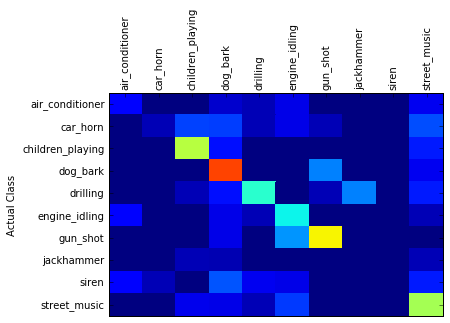

In [126]:
plotHeatmap(y_test, y_test_pred, y_labels, printCF=True)